<a href="https://colab.research.google.com/github/MichalKosciolek/Introduction-to-Data-Analysis/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# notatka dla osobnika zwanego michałem kościelnym -> nudze sie wiec ci pisze jakies pierdoly xdddd -> xDD
# a, i okomentowałem kodzik, po ***angielsku*** -> good job mate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab import drive
from statistics import mean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# mount google drive and import files
drive.mount('/content/drive')
Adelaide = pd.read_csv('/content/drive/MyDrive/Data_analitics/Adelaide_Data.csv', header=None)
Perth = pd.read_csv('/content/drive/MyDrive/Data_analitics/Perth_Data.csv', header=None)
Sydney = pd.read_csv('/content/drive/MyDrive/Data_analitics/Sydney_Data.csv', header=None)
Tasmania = pd.read_csv('/content/drive/MyDrive/Data_analitics/Tasmania_Data.csv', header=None)

Mounted at /content/drive


In [ ]:
# creating of data frames for each city
Perth_df = pd.DataFrame(Perth)
Adelaide_df = pd.DataFrame(Adelaide)
Sydney_df = pd.DataFrame(Sydney)
Tasmania_df = pd.DataFrame(Tasmania)

# adding names to columns, for easier computing and navigating
dataframe_columns = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16",
              "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16",
              "P1", "P2", "P3", "P4", "P5", "P6", "P7", "P8", "P9", "P10", "P11", "P12", "P13", "P14", "P15", "P16",
              "OUTPUT"]

Perth_df.columns = dataframe_columns
Adelaide_df.columns = dataframe_columns
Sydney_df.columns = dataframe_columns
Tasmania_df.columns = dataframe_columns

# useless code -> probably trash to delete
Perth_df.to_numpy()
Adelaide_df.to_numpy()
Sydney_df.to_numpy()
Tasmania_df.to_numpy()
############################

Perth_df.head()

X1        X2        X3      X4        X5        X6        X7  \
0  427.0737  155.1636  476.0661  5.7677  255.5230  410.5835  516.3158   
1  427.4820  147.4593  474.9960  9.5407  258.2593  404.2589  524.3422   
2  423.7709  155.9451  470.8182  4.0438  253.8868  390.2231  509.0224   
3  431.8288  146.6720  466.1145  7.0164  261.3787  408.9941  521.9852   
4  437.7897  141.3579  474.3819  4.3434  256.5644  393.0113  516.1617   

        X8       X9       X10  ...           P8          P9         P10  \
0  47.4719  75.7125  463.0522  ...  100328.8932  79696.1132  90093.0925   
1  44.4009  70.4385  468.8828  ...   98879.6861  82893.9171  89158.6518   
2  50.7996  72.8076  463.4203  ...  100504.0370  81572.7820  89932.3496   
3  44.0360  77.5854  450.5736  ...   99857.6062  82267.0302  88657.7954   
4  52.4880  66.1179  457.0365  ...   99953.9882  80579.2854  88819.3409   

          P11          P12         P13         P14          P15         P16  \
0  79395.6995  100893.8537  91116.6415  98560.6700   99789.2341  78199.7899   
1  80356.5067  100927.1007  89760.5631  97828.2206   99214.7876  79108.3094   
2  80588.3130  100977.1693  90274.1347  97757.2251   99333.6857  79691.2458   
3  79139.2437  100480.0554  91102.1702  98224.0435  100672.3076  78387.9296   
4  80145.6969  100693.3759  89663.6079  97947.9575  100924.1871  80104.7240   

        OUTPUT  
0  1480707.346  
1  1479133.940  
2  1475814.243  
3  1484052.684  
4  1479350.362  

[5 rows x 49 columns]

In [ ]:
#Głupia próba połączenia wszystkich dataframe'ów w jeden
combined_df = pd.concat([Perth_df, Adelaide_df, Sydney_df, Tasmania_df])
combined_df
#Ogólnie okazało się, że wywala colaba jak tego używam także niewypał xd (kto by się spodziewał)

X1        X2        X3        X4        X5        X6        X7  \
2      423.7709  155.9451  470.8182    4.0438  253.8868  390.2231  509.0224   
3      431.8288  146.6720  466.1145    7.0164  261.3787  408.9941  521.9852   
5      450.8980  144.7559  475.3267    2.5512  241.1346  400.2228  510.2312   
6      438.4449  145.8895  480.3081    0.0000  257.6128  406.4007  518.2356   
7      424.0230  149.5980  475.5490    6.5324  248.6003  411.4488  510.8031   
...         ...       ...       ...       ...       ...       ...       ...   
71995  447.4090   80.6710   74.8115  495.8420  520.5531  205.9689   20.4930   
71996  565.5693  522.9972  437.3214   88.5190    8.5200  429.1224  564.0161   
71997   49.7652   90.4154  110.6000  532.7479  428.7800  101.1560   13.6231   
71998  539.4314  154.6262  493.8225    2.3327  217.3275  480.6632  565.6854   
71999  565.6854   98.0576  437.2540   58.9012  160.7589  424.0946  509.1169   

             X8        X9       X10  ...           P8           P9  \
2       50.7996   72.8076  463.4203  ...  100504.0370   81572.7820   
3       44.0360   77.5854  450.5736  ...   99857.6062   82267.0302   
5       54.6467   78.7078  466.5793  ...  101316.4648   77925.4484   
6       45.6470   72.2370  463.7746  ...  101263.2560   83744.1701   
7       51.3025   77.3265  465.1731  ...  100718.7541   81376.6988   
...         ...       ...       ...  ...          ...          ...   
71995  541.6594  368.6631  529.5737  ...  246978.9773  266753.2997   
71996   38.1109  339.2581   79.0079  ...  230982.2595  215653.6026   
71997  506.2370  450.6601  552.8977  ...  222247.9781  267064.3316   
71998  165.0820   83.0391   55.2986  ...  212928.1552  174414.1646   
71999  221.6505  139.6076  111.8671  ...  225457.4783  193769.5207   

               P10          P11          P12          P13          P14  \
2       89932.3496   80588.3130  100977.1693   90274.1347   97757.2251   
3       88657.7954   79139.2437  100480.0554   91102.1702   98224.0435   
5       87779.9566   81388.1816  100582.6873   91470.9832   97741.0470   
6       89760.5214   79319.8657   99682.5028   89471.1233   98482.9333   
7       89672.0156   80476.5874  101344.7753   91465.2495   98261.4720   
...            ...          ...          ...          ...          ...   
71995  212646.4644  238222.2140  265330.3691  198680.1198  205402.4175   
71996  223123.6389  185182.2772  241851.2671  265073.5264  266772.6413   
71997  257782.2912  233764.7869  241481.1899  228687.0804  210579.6182   
71998  265975.9059  265511.9281  186135.0619  212594.3104  228857.0326   
71999  267991.6425  265206.3409  230342.6521  210565.9681  230551.3241   

               P15          P16       OUTPUT  
2       99333.6857   79691.2458  1475814.243  
3      100672.3076   78387.9296  1484052.684  
5      100097.4638   79993.7164  1480235.758  
6       98829.3857   78649.5447  1484054.528  
7       99441.7509   78232.1068  1484466.604  
...            ...          ...          ...  
71995  163774.3168  141090.0287  3536650.863  
71996  200968.4820  230855.6899  3645856.545  
71997  236459.0060  222454.7973  3718330.844  
71998  267671.1880  249700.4554  3685475.541  
71999  265369.2457  240729.0166  3733281.103  

[259494 rows x 49 columns]

In [ ]:
#testy -> bezpiecznie mozna skasowac
new_perth_df = Perth_df.drop(2)
new_perth_df.head()

X1        X2        X3      X4        X5        X6        X7  \
3  431.8288  146.6720  466.1145  7.0164  261.3787  408.9941  521.9852   
5  450.8980  144.7559  475.3267  2.5512  241.1346  400.2228  510.2312   
6  438.4449  145.8895  480.3081  0.0000  257.6128  406.4007  518.2356   
7  424.0230  149.5980  475.5490  6.5324  248.6003  411.4488  510.8031   
8  439.7945  150.9443  462.8802  0.0000  256.5223  402.1251  524.6089   

        X8       X9       X10  ...           P8          P9         P10  \
3  44.0360  77.5854  450.5736  ...   99857.6062  82267.0302  88657.7954   
5  54.6467  78.7078  466.5793  ...  101316.4648  77925.4484  87779.9566   
6  45.6470  72.2370  463.7746  ...  101263.2560  83744.1701  89760.5214   
7  51.3025  77.3265  465.1731  ...  100718.7541  81376.6988  89672.0156   
8  52.3963  77.1711  464.1097  ...  100994.2872  81760.3887  90067.2775   

          P11          P12         P13         P14          P15         P16  \
3  79139.2437  100480.0554  91102.1702  98224.0435  100672.3076  78387.9296   
5  81388.1816  100582.6873  91470.9832  97741.0470  100097.4638  79993.7164   
6  79319.8657   99682.5028  89471.1233  98482.9333   98829.3857  78649.5447   
7  80476.5874  101344.7753  91465.2495  98261.4720   99441.7509  78232.1068   
8  80112.7795  101038.5411  89971.7756  97755.5738  100208.6156  78694.9356   

        OUTPUT  
3  1484052.684  
5  1480235.758  
6  1484054.528  
7  1484466.604  
8  1487005.295  

[5 rows x 49 columns]

In [ ]:
# thats the code that removes all the entries where some value X1-Y16 is on the edge
# the code is probably just another trash, because it makes the error bigger
xy_cols_keys = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9", "X10", "X11", "X12", "X13", "X14", "X15", "X16",
              "Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10", "Y11", "Y12", "Y13", "Y14", "Y15", "Y16"]

new_Perth_df = Perth_df[~(Perth_df[xy_cols_keys] == 566).any(axis=1)]
print(new_Perth_df.shape)
print(new_Perth_df[xy_cols_keys].max())

Perth_df = new_Perth_df

(43495, 49)
X1     565.9831
X2     565.6854
X3     565.9980
X4     565.9690
X5     565.6858
X6     565.9934
X7     565.6854
X8     565.8718
X9     565.6854
X10    565.9845
X11    565.8416
X12    565.9973
X13    565.6854
X14    565.9723
X15    565.9936
X16    565.9966
Y1     565.9570
Y2     565.8927
Y3     565.9745
Y4     565.9838
Y5     565.9960
Y6     565.9268
Y7     565.9689
Y8     565.7363
Y9     565.9759
Y10    565.9921
Y11    565.9697
Y12    565.6854
Y13    565.9787
Y14    565.8490
Y15    565.9957
Y16    565.9443
dtype: float64


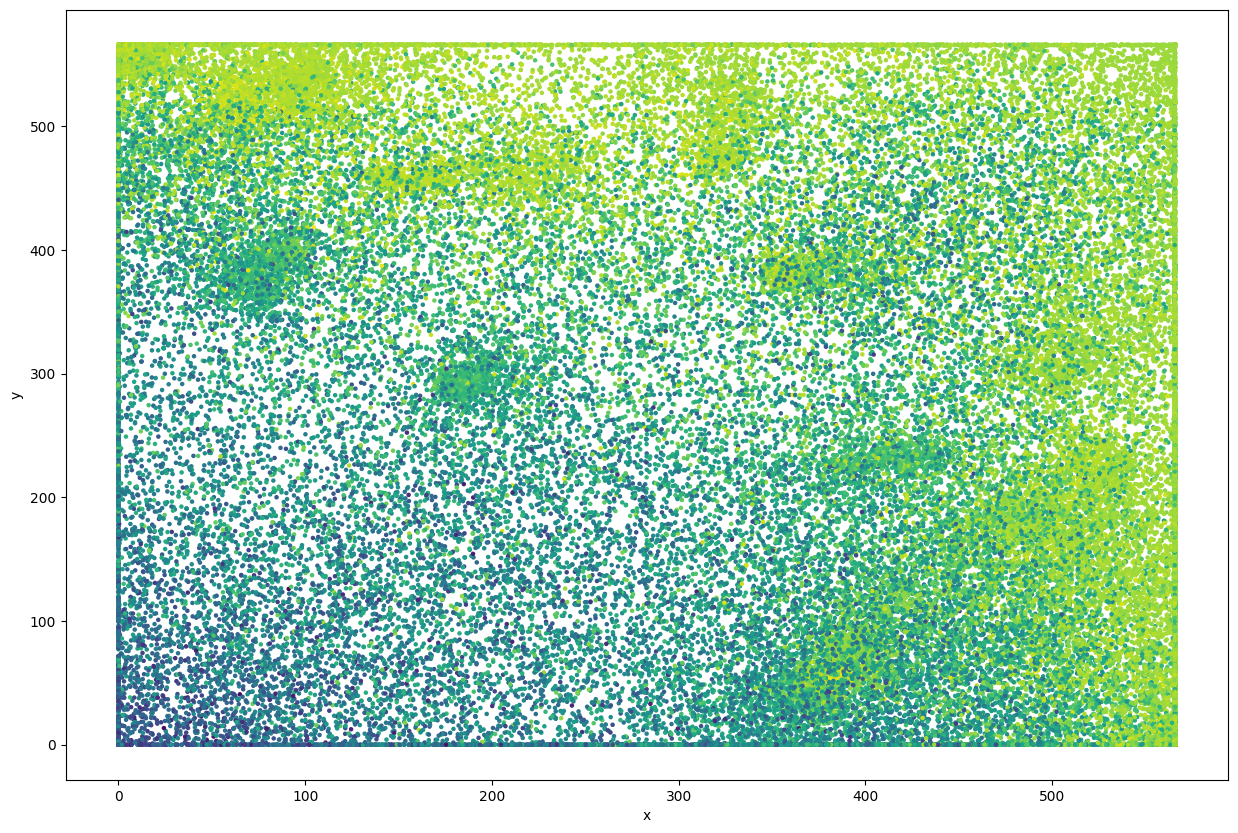

In [ ]:
# this code creates a plot, in which we can see energy output of a single machine
X = []
Y = []
P = []
boja = 0
for index, row in Perth_df.iterrows():
  X.append(row[0+boja])
  Y.append(row[16+boja])
  P.append(row[32+boja])

plt.figure(figsize=(15,10))
plt.scatter(X, Y, c=P, cmap='viridis', s=5)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

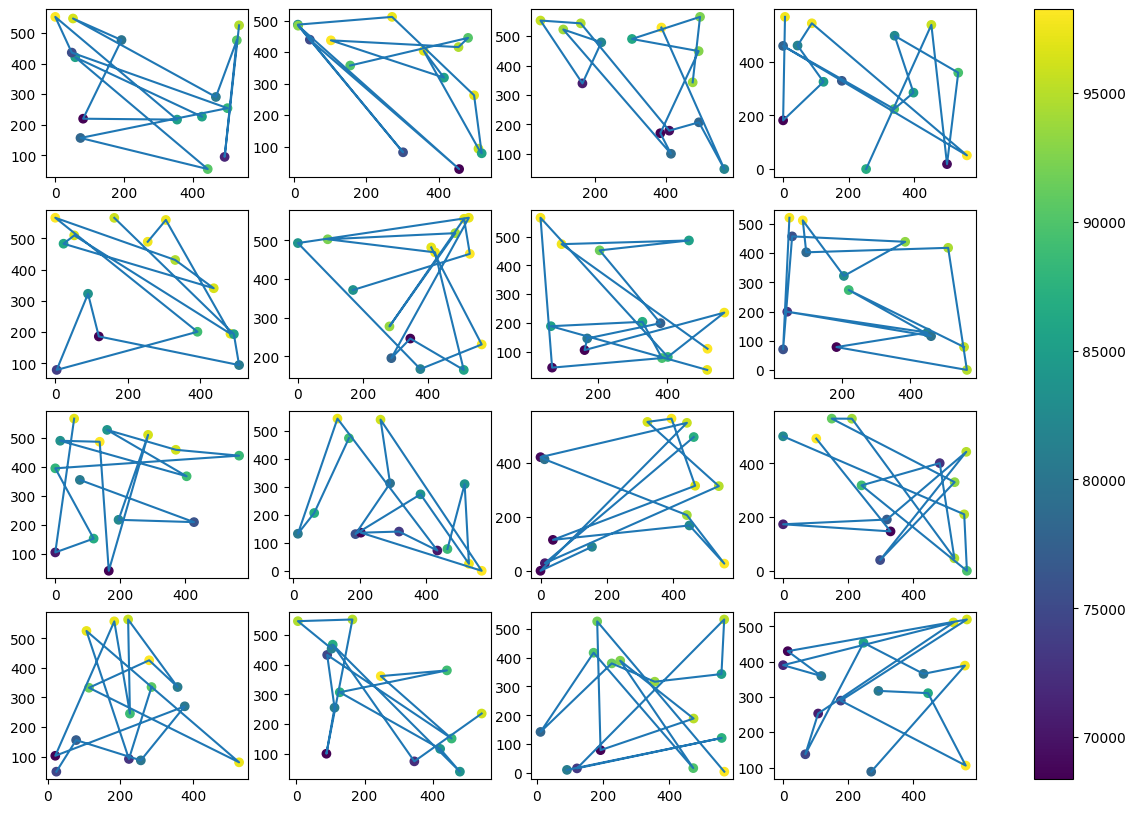

In [ ]:
# this code shows the way the machines were moving
# single dot is made after every 5000 reads
# in this case we can see, that the machine could go anywhere

X_s = []
Y_s = []
P_s = []

fig, axs = plt.subplots(4, 4, figsize=(15,10))
axs = axs.ravel()

index = 0
for i in range(0, 16):
  for ind, row in Perth_df.iterrows():
    if ind % 5000 == 0:
      X_s.append(row[i])
      Y_s.append(row[i + 16])
      P_s.append(row[i + 32])

  ax = axs[i]
  ax.plot(X_s, Y_s)
  scatter = ax.scatter(X_s, Y_s, c=P_s, cmap='viridis')

  X_s.clear()
  Y_s.clear()
  P_s.clear()

fig.colorbar(scatter, ax=axs.ravel().tolist())

plt.show()

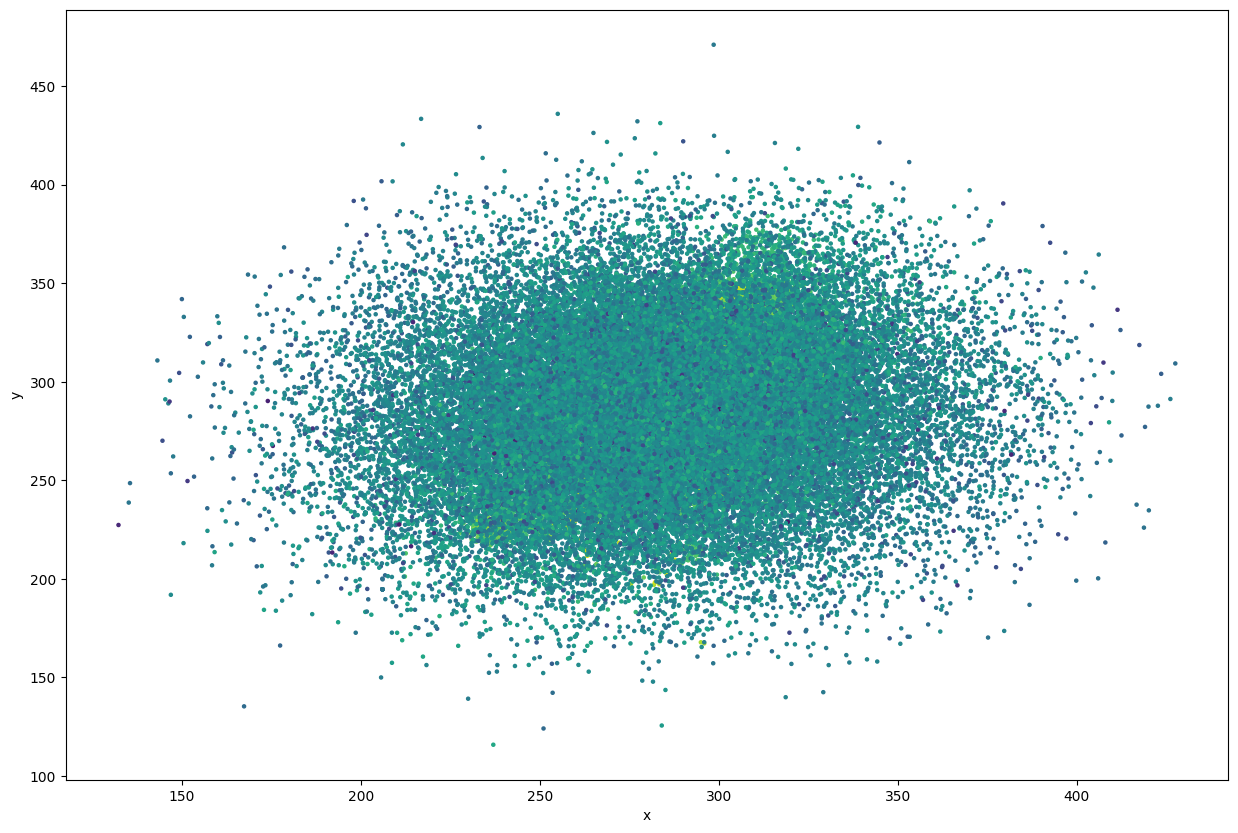

In [ ]:
# the Michał's favourite plot, made by me, the commenter (WOW)
#ah, yes, my favourite plot indeed
X = []
Y = []
P = []
for index, row in Perth_df.iterrows():
  x = 0
  y = 0
  p = 0
  for i in range(0, 16):
    x += row[i]
    y += row[i + 16]
    p += row[i + 32]
  X.append(x/16)
  Y.append(y/16)
  P.append(p/16)

plt.figure(figsize=(15,10))
plt.scatter(X, Y, c=P, s=5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

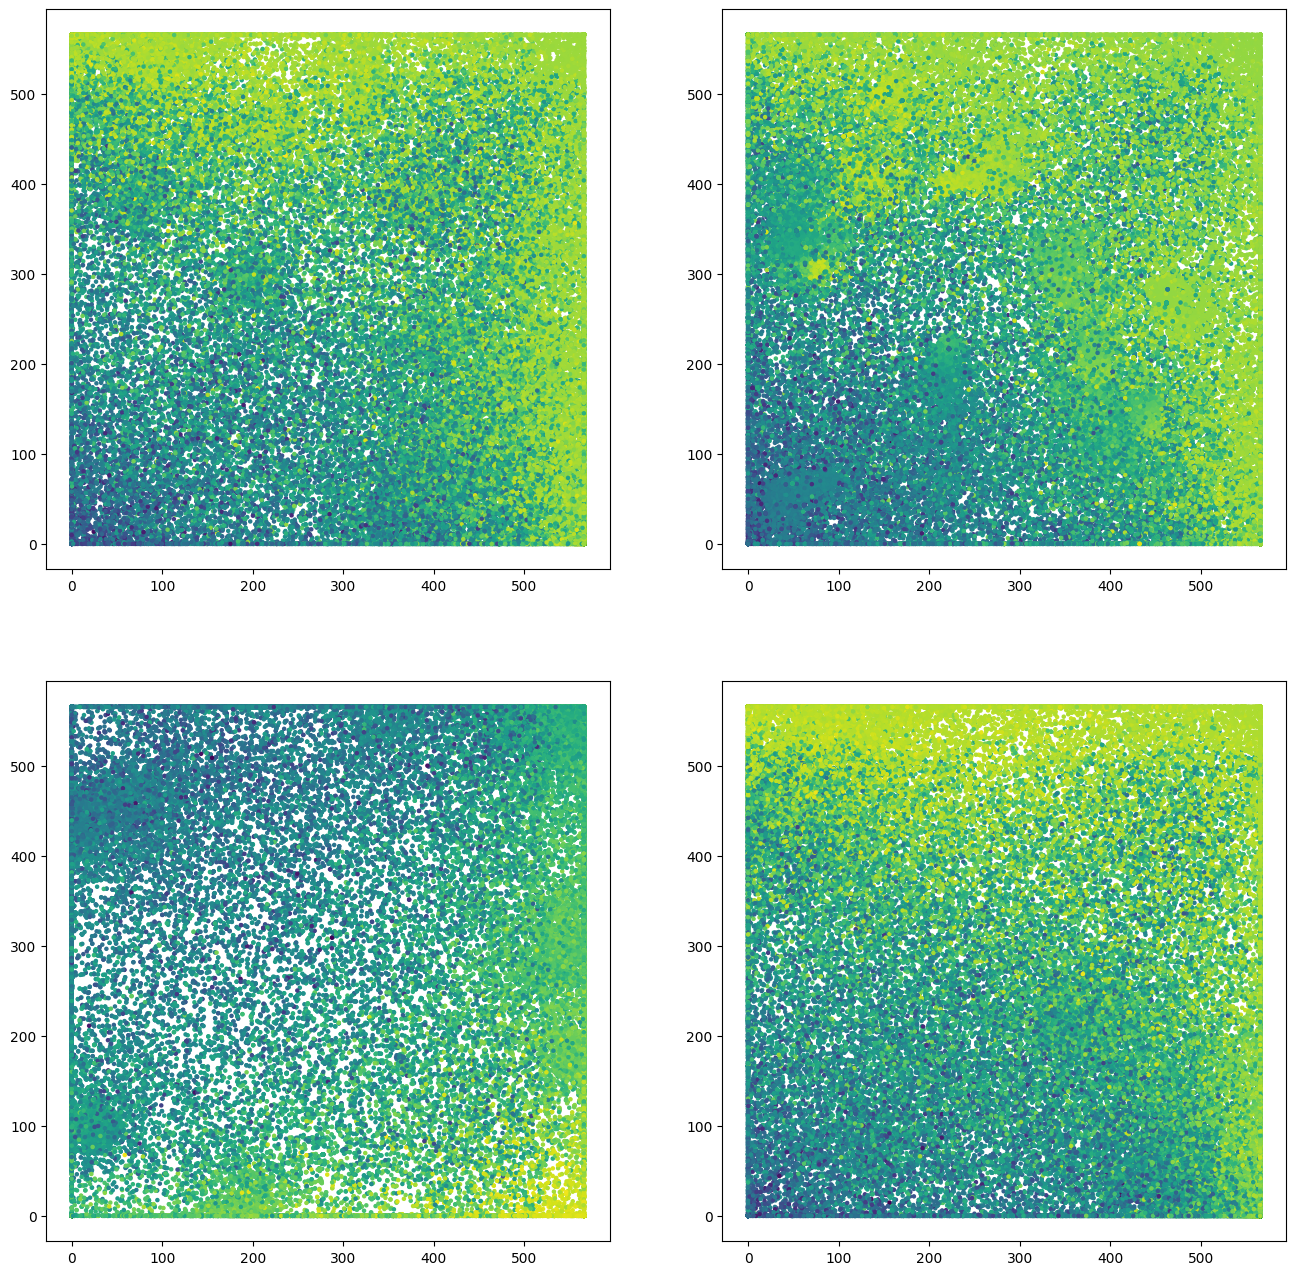

In [ ]:
# this code is a bit interesting, not in the analytics case, but overall,
# it shows how the energy production works for each city, which can give us a little bit of
# intuition, about what the models testing plots should look like

fig, axs = plt.subplots(2, 2, figsize=(16, 16))
boja_nr = 0+0

##################################### Perth plot
X = []
Y = []
P = []
for index, row in Perth_df.iterrows():
  X.append(row[0+ boja_nr ])
  Y.append(row[16+ boja_nr ])
  P.append(row[32+ boja_nr ])

axs[0, 0].scatter(X, Y, c=P, cmap='viridis', s=5)

##################################### Adelaide plot
X = []
Y = []
P = []
for index, row in Adelaide_df.iterrows():
  X.append(row[0+ boja_nr ])
  Y.append(row[16+ boja_nr ])
  P.append(row[32+ boja_nr ])

axs[0, 1].scatter(X, Y, c=P, cmap='viridis', s=5)

##################################### Sydney plot
X = []
Y = []
P = []
for index, row in Sydney_df.iterrows():
  X.append(row[0+ boja_nr ])
  Y.append(row[16+ boja_nr ])
  P.append(row[32+ boja_nr ])

axs[1, 0].scatter(X, Y, c=P, cmap='viridis', s=5)

##################################### Tasmania plot
X = []
Y = []
P = []
for index, row in Tasmania_df.iterrows():
  X.append(row[0+ boja_nr ])
  Y.append(row[16+ boja_nr ])
  P.append(row[32+ boja_nr ])

axs[1, 1].scatter(X, Y, c=P, cmap='viridis', s=5)


plt.show()

In [ ]:
# functions to standardize used data

def standardize(X):
    x_mean = np.mean(X, 0)
    x_std = np.std(X, 0)
    return (X - x_mean) / x_std, x_mean, x_std

def destandardize(X, means, sds):
    return X * sds + means

In [ ]:
# First model, which is the LinearRegression model. The model is in fact linear,
# but it uses PolynomialFeatures. This thing doesnt change the model into polynomial,
# but affects it a bit. Now it is still Linear model, but with non-linear regression function.
# Paramiters used by model are indeed still linear to variables.


# preparing data for model
XY_columns = Perth_df.columns[:32]
XY_coordinates = Perth_df[XY_columns]
P_value = Perth_df[['OUTPUT']]

# standardizing data
XY_coordinates_std, xy_mean, xy_std = standardize(XY_coordinates)
P_value_std, p_mean, p_std  = standardize(P_value)

# splitting data into 3 parts:
# training set    - 70%
# testing set     - 15%
# validating set  - 15%
XY_coordinates_train, XY_coordinates_rest, P_value_train, P_value_rest = train_test_split(XY_coordinates_std, P_value_std, test_size=0.3, random_state=43)
XY_coordinates_test, XY_coordinates_validate, P_value_test, P_value_validate = train_test_split(XY_coordinates_rest, P_value_rest, test_size=0.5, random_state=43)

# creating polynomial features for linear model
poly = PolynomialFeatures(3, include_bias = True)
poly_features = poly.fit_transform(XY_coordinates_train)

# creating and fitting the model
model = LinearRegression()
model.fit(poly_features, P_value_train)

# predicting the values
P_value_pred = model.predict(poly.fit_transform(XY_coordinates_test))

# printing to check things
print(XY_coordinates_test.shape)
print(np.min(P_value_pred))
print(np.max(P_value_pred))
print("Rooted mean squared error equals: {0}".format(mean_squared_error(P_value_pred, P_value_test, squared=False)))


(10800, 32)
-2.7786102294921875
3.2954063415527344
Rooted mean squared error equals: 0.39762263089121175


Degree: 1 -> Rooted mean squared error equals: 0.9294440312636574
Degree: 2 -> Rooted mean squared error equals: 0.42329213535365745
Degree: 3 -> Rooted mean squared error equals: 0.39762263089121175


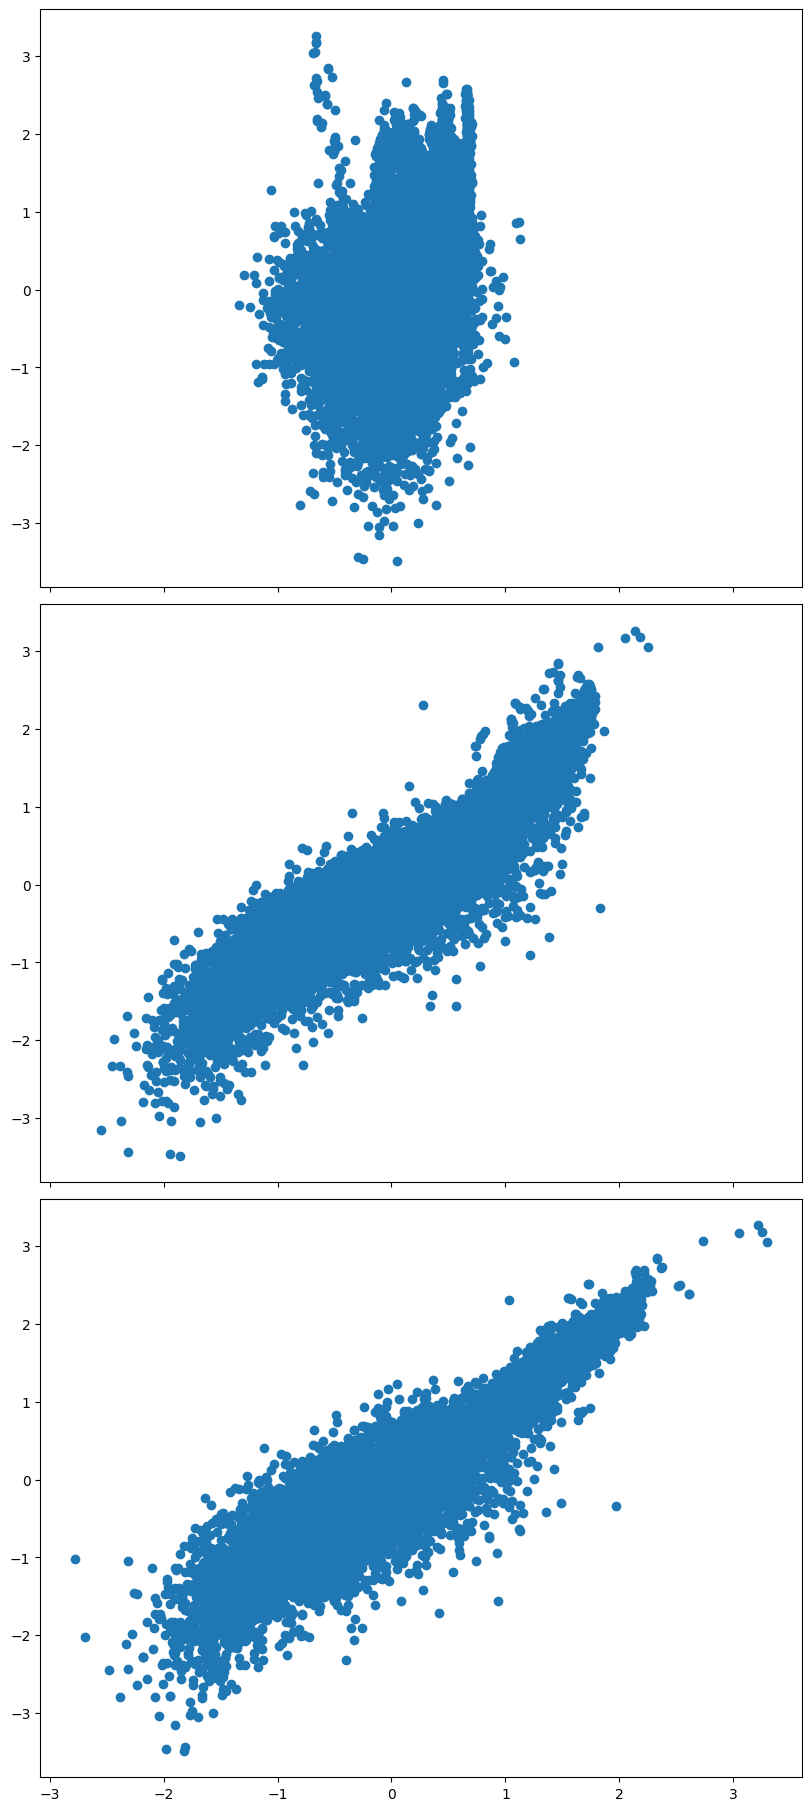

In [ ]:
# almost exact same code as above, however, the error is slightly higher due to diffrent data split :/


# preparing data for model
XY_columns = Perth_df.columns[:32]
XY_coordinates = Perth_df[XY_columns]
P_value = Perth_df[['OUTPUT']]

# standardizing data
XY_coordinates_std, xy_mean, xy_std = standardize(XY_coordinates)
P_value_std, p_mean, p_std  = standardize(P_value)

# splitting data into 3 parts:
# training set    - 70%
# testing set     - 15%
# validating set  - 15%
XY_coordinates_train, XY_coordinates_rest, P_value_train, P_value_rest = train_test_split(XY_coordinates_std, P_value_std, test_size=0.3, random_state=43)
XY_coordinates_test, XY_coordinates_validate, P_value_test, P_value_validate = train_test_split(XY_coordinates_rest, P_value_rest, test_size=0.5, random_state=43)

# preparing plot space
fig, axs = plt.subplots(3, sharex=True, sharey=True, layout="constrained")
fig.set_figheight(18)
fig.set_figwidth(8)

# calculating 3 diffrent models and plotting them
# only to degree "3", because higher degree would crash the environment -> out of RAM
for degree in range(1, 4):
  # creating polynomial features for linear model
  poly = PolynomialFeatures(degree, include_bias = True)
  poly_features = poly.fit_transform(XY_coordinates_train)

  # creating and fitting the model
  model = LinearRegression()
  model.fit(poly_features, P_value_train)

  # predicting the values
  P_value_pred = model.predict(poly.fit_transform(XY_coordinates_test))

  #printing the error for each degree model
  print("Degree: {0} -> Rooted mean squared error equals: {1}".format(degree, mean_squared_error(P_value_pred, P_value_test, squared=False)))

  #plotting part
  axs[degree-1].scatter(np.array(P_value_pred), np.array(P_value_test))
  #plt.xlabel("predicted_values")
  #plt.ylabel("test_values")

plt.show()


DataFrame: Perth, Degree: 1 -> Rooted mean squared error equals: 0.9294440312636574
DataFrame: Perth, Degree: 2 -> Rooted mean squared error equals: 0.42329213535365745
DataFrame: Perth, Degree: 3 -> Rooted mean squared error equals: 0.39762263089121175

DataFrame: Tasmania, Degree: 1 -> Rooted mean squared error equals: 0.9133697206869008
DataFrame: Tasmania, Degree: 2 -> Rooted mean squared error equals: 0.5116670993575392
DataFrame: Tasmania, Degree: 3 -> Rooted mean squared error equals: 0.49545960561593744

DataFrame: Adelaide, Degree: 1 -> Rooted mean squared error equals: 0.9126444218544111
DataFrame: Adelaide, Degree: 2 -> Rooted mean squared error equals: 0.40001832935504694
DataFrame: Adelaide, Degree: 3 -> Rooted mean squared error equals: 0.36391149726760175

DataFrame: Sydney, Degree: 1 -> Rooted mean squared error equals: 0.9452153312126391
DataFrame: Sydney, Degree: 2 -> Rooted mean squared error equals: 0.41766501042186427
DataFrame: Sydney, Degree: 3 -> Rooted mean squ

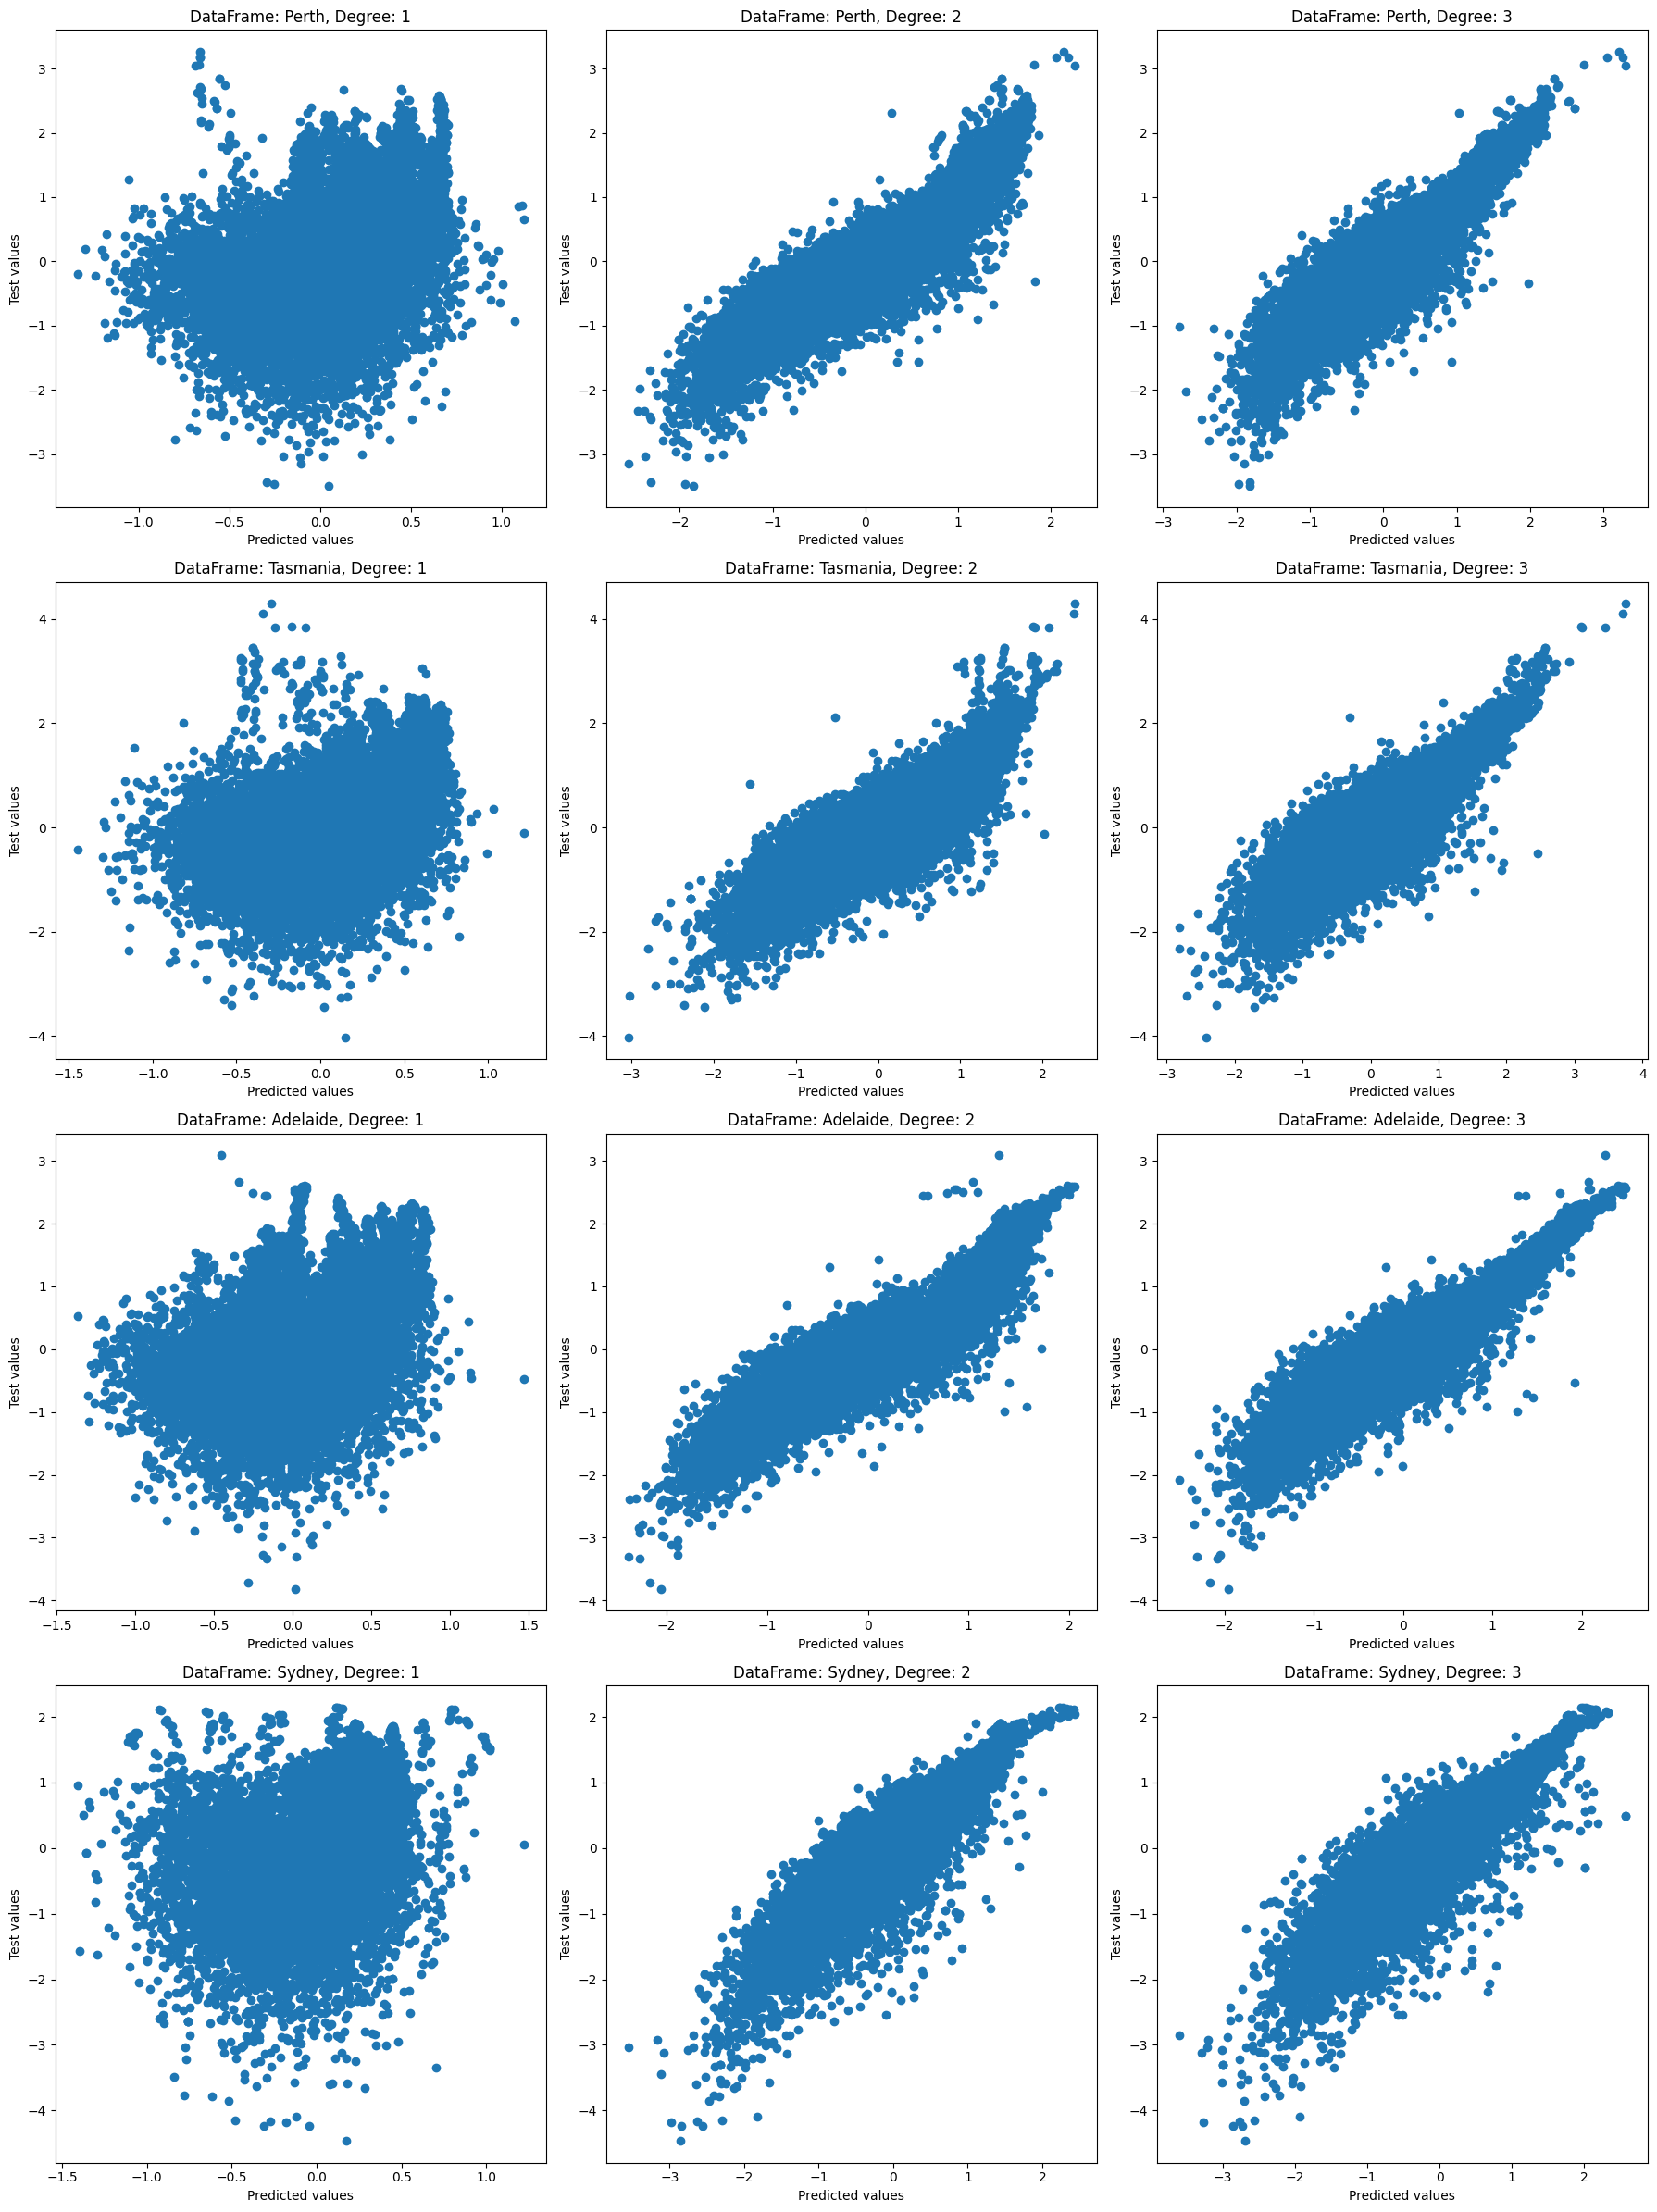

In [ ]:
# List of dataframes
df_list = [Perth_df, Tasmania_df, Adelaide_df, Sydney_df]
df_names = ['Perth', 'Tasmania', 'Adelaide', 'Sydney']

# Preparing plot space
fig, axs = plt.subplots(4, 3, figsize=(18, 24))

models = []
polies = []
for i, df in enumerate(df_list):
    # Preparing data for model
    XY_columns = df.columns[:32]
    XY_coordinates = df[XY_columns]
    P_value = df[['OUTPUT']]

    # Standardizing data
    XY_coordinates_std, xy_mean, xy_std = standardize(XY_coordinates)
    P_value_std, p_mean, p_std  = standardize(P_value)

    # Splitting data into 3 parts:
    # Training set    - 70%
    # Testing set     - 15%
    # Validating set  - 15%
    XY_coordinates_train, XY_coordinates_rest, P_value_train, P_value_rest = train_test_split(XY_coordinates_std, P_value_std, test_size=0.3, random_state=43)
    XY_coordinates_test, XY_coordinates_validate, P_value_test, P_value_validate = train_test_split(XY_coordinates_rest, P_value_rest, test_size=0.5, random_state=43)

    # Calculating 3 different models and plotting them
    # Only to degree "3", because higher degree would crash the environment -> out of RAM
    for degree in range(1, 4):
        # Creating polynomial features for linear model
        poly = PolynomialFeatures(degree, include_bias = True)
        poly_features = poly.fit_transform(XY_coordinates_train)
        polies.append(poly)

        # Creating and fitting the model
        model = LinearRegression()
        model.fit(poly_features, P_value_train)
        models.append(model)

        # Predicting the values
        P_value_pred = model.predict(poly.fit_transform(XY_coordinates_test))

        # Printing the error for each degree model
        print("DataFrame: {0}, Degree: {1} -> Rooted mean squared error equals: {2}".format(df_names[i], degree, mean_squared_error(P_value_pred, P_value_test, squared=False)))

        #random_indicates = np.random.choice
        # Plotting part
        axs[i, degree-1].scatter(np.array(P_value_pred), np.array(P_value_test))
        axs[i, degree-1].set_title('DataFrame: {0}, Degree: {1}'.format(df_names[i], degree))
        axs[i, degree-1].set_xlabel('Predicted values')
        axs[i, degree-1].set_ylabel('Test values')

    print()

plt.tight_layout()
plt.show()

In [ ]:
#Czyli najlepsze wyniki mamy dla Adelaide
#btw te modele liczą się jakieś poł godziny xdd

In [ ]:
# error przed usuwaniem boi ktore powyplywaly poza obszar pomiaru:
# Rooted mean squared error equals: 0.39532626959097544

# po usunieciu, error wyniosl:
# -> 0.45.... czyli juzlez
# po zmianie na include bias -> 0.43... czyżbyśmy zmierzali do odkrycia lepszego modelu?

# tutaj po ponownym uwzględnieniu wszystkich próbek i biasu
# -> Rooted mean squared error equals: 0.38296988449704417 (COOOOOOOOOOOOOOOOOO, nowy lepszy błąd??? :D poprawa o ~0.013)
#
# error in above (the 70/15/15 spplit)
# -> Rooted mean squared error equals: 0.39762263089121175

In [ ]:
# TO JEST KOD CZATA GIPITI -> BLAD: 0.3829662956270889
# gdzie nasz błąd wynosi:           0.38296988449704417
# czyli jak widać, poprawił go o    0.000003.....

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Załaduj dane, zakładam, że masz już DataFrame 'Perth_df'
# ...

# Standaryzacja
def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    standardized_data = (data - mean) / std
    return standardized_data, mean, std

XY_columns = Perth_df.columns[:32]
XY_coordinates = Perth_df[XY_columns]
P_value = Perth_df[['OUTPUT']]

XY_coordinates_std, xy_mean, xy_std = standardize(XY_coordinates)
P_value_std, p_mean, p_std = standardize(P_value)

XY_coordinates_train, XY_coordinates_test, P_value_train, P_value_test = train_test_split(
    XY_coordinates_std, P_value_std, test_size=0.15, random_state=43
)

# Utwórz pipeline z wielomianowymi cechami i modelem regresji Ridge
ridge_model = Ridge()
pipeline = make_pipeline(PolynomialFeatures(), ridge_model)

# Ustaw parametry do przeszukania
param_grid = {'polynomialfeatures__degree': [1, 2, 3]}

# Użyj GridSearchCV do znalezienia optymalnych parametrów
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(XY_coordinates_train, P_value_train)

# Najlepszy stopień wielomianu
best_degree = grid_search.best_params_['polynomialfeatures__degree']

# Utwórz ostateczny model z optymalnym stopniem wielomianu
final_model = make_pipeline(PolynomialFeatures(degree=best_degree), Ridge())
final_model.fit(XY_coordinates_train, P_value_train)

# Ocena na danych testowych
P_value_pred = final_model.predict(XY_coordinates_test)
rmse = mean_squared_error(P_value_test, P_value_pred, squared=False)

print("Najlepszy stopień wielomianu: {0}".format(best_degree))
print("Rooted mean squared error po optymalizacji: {0}".format(rmse))

Najlepszy stopień wielomianu: 3
Rooted mean squared error po optymalizacji: 0.3829662956270889


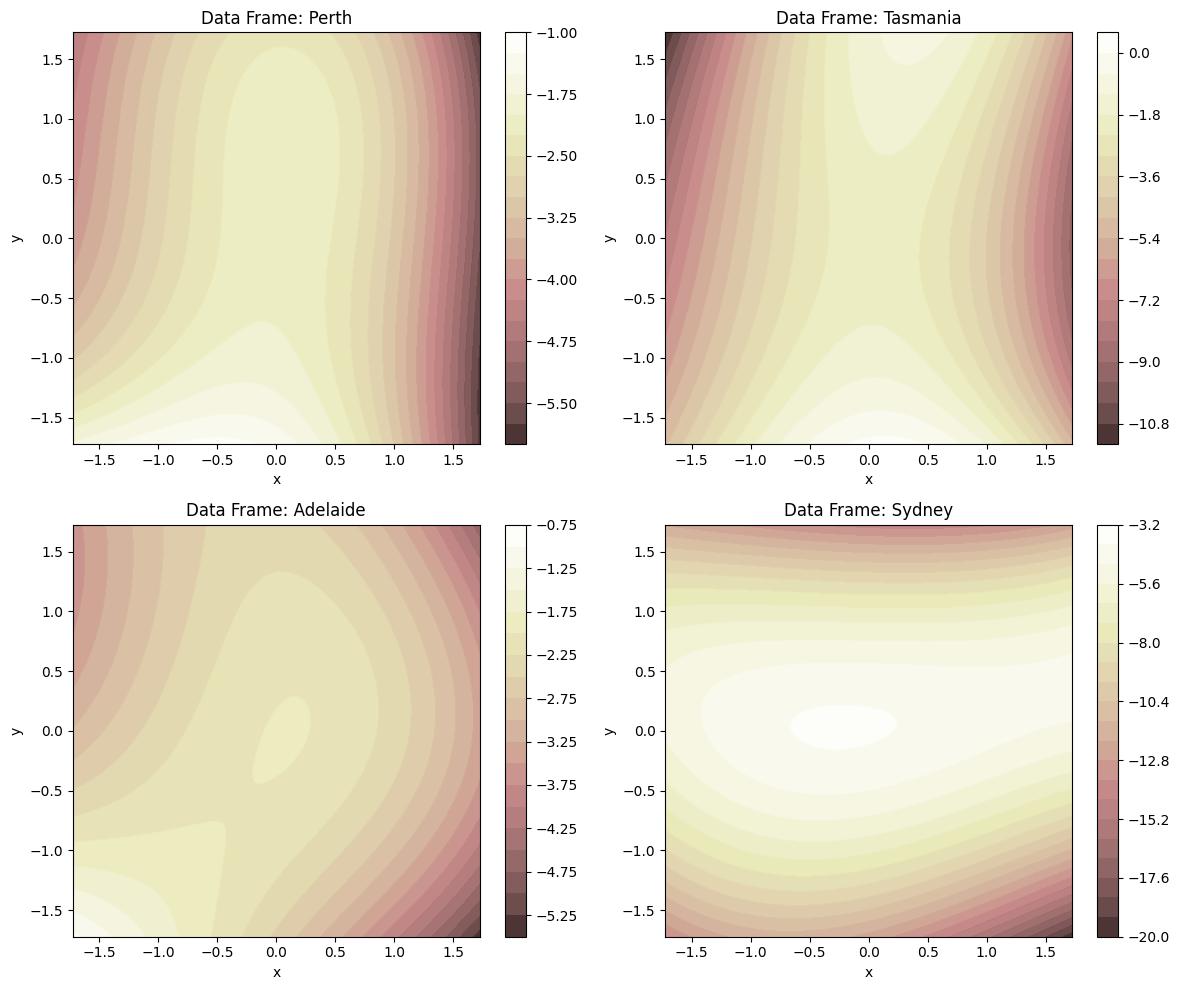

In [ ]:
n = 201

#linspace
x_values = np.linspace(0, 566, n)
y_values = np.linspace(0, 566, n)

x_values_std, x_mean, x_std = standardize(x_values)
y_values_std, y_mean, y_std = standardize(y_values)

#inicjalizacja siatek do plota
xv, yv = np.meshgrid(x_values_std, y_values_std)

xy_plot = np.zeros((n*n, 32))
xy_plot_2d = np.zeros((n, n))

ind = 0
for i in range(n):
  for j in range(n):
    xy_plot[ind][:16] = xv[i, j]
    xy_plot[ind][16:33] = yv[i, j]
    ind += 1

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

model_index = 2
for m in range(4):

  #przewidywanie outputow
  p_pred_plot = models[model_index].predict(polies[model_index].fit_transform(xy_plot))
  model_index += 3

  #wypelnianie siatki do wykresu
  ind = 0
  for i in range(n):
    for j in range(n):
      xy_plot_2d[i][j] = p_pred_plot[ind]
      ind += 1

  #plotowanie heatmapy
  ax = axes[m // 2, m % 2]
  c = ax.contourf(xv, yv, xy_plot_2d, 20, alpha=0.9, cmap=cm.pink)
  cbar = fig.colorbar(c, ax=ax)
  ax.set_title(f'Data Frame: {df_names[m]}')
  ax.set_xlabel('x')
  ax.set_ylabel('y')

plt.tight_layout()
plt.show()

In [ ]:
#to jest wykres bledu, nie heatmapa
n = 101

#linspace
x_values = np.linspace(0, 566, n)
y_values = np.linspace(0, 566, n)

#standaryzacja linspaców
#x_values_std = scaler_xy.fit_transform(x_values.reshape(-1, 1))
#y_values_std = scaler_xy.fit_transform(y_values.reshape(-1, 1))

#to jest zamiast tego komentarza wyzej
x_values_std, x_mean, x_std = standardize(x_values)
y_values_std, y_mean, y2_std = standardize(y_values)

#inicjalizacja siatek do plota
xv, yv = np.meshgrid(x_values_std, y_values_std)

xy_plot = np.zeros((n*n, 32))
xy_plot_2d = np.zeros((n, n))
print(xy_plot)

#wypelnianie siatek podsatwowe
ind = 0
for i in range(n):
  for j in range(n):
    xy_plot[ind][:16] = xv[i, j]
    xy_plot[ind][16:33] = yv[i, j]
    ind += 1

#przewidywanie outputow
p_pred_plot = model.predict(poly.fit_transform(xy_plot))
print(np.min(p_pred_plot))
print(np.max(p_pred_plot))

############################## szukanie bledu (sekcja ktora jak nie wyjdzie to jest do wywalenia)

def predict(b, X):
    return np.dot(X, b)

def cost(y_pred, y_true):
    return np.linalg.norm(y_pred-y_true)**2 / len(y_true)


b_arr = np.linspace(-2, 2, num=n)
cost_arr = [cost(predict(b, poly.fit_transform(XY_coordinates_test)), P_value_test) for b in b_arr]

min_cost_index = np.argmin(cost_arr)
min_cost_value = cost_arr[min_cost_index]
min_b1_value = b_arr[min_cost_index]

print(f'Minimum funkcji kosztu: {min_cost_value}')
print(f'Odpowiadająca mu wartość b1: {min_b1_value}')

#plot bledu
best_b1 = b_arr[np.argmin(cost_arr)]
plt.plot(b_arr, cost_arr)

####################################################################################


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-5.8137664794921875
-1.1828727722167969


ValueError: ignored

In [ ]:
_XY_stand, XY_mean, XY_std = standardize(XY_model)
P_stand, P_mean, P_std = standardize(P_values)


poly = PolynomialFeatures(1, include_bias = False)
poly_features = poly.fit_transform(XY_stand)
model = LinearRegression()
model.fit(poly_features, P_stand)
p_predicted = model.predict(poly_features)

print(p_predicted)
print("Mean squared error equals: {0}".format(mean_squared_error(p_predicted, P_stand)))


In [ ]:
XY_model_train, XY_model_test, P_values_train, P_values_test = train_test_split(XY_stand, P_stand, test_size=0.3, random_state=43)

model = LinearRegression()
model.fit(XY_model_train, P_values_train)

P_values_pred = model.predict(XY_model_test)
print(P_values_pred)
print("Mean squared error equals: {0}".format(mean_squared_error(P_values_pred, P_values_test)))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

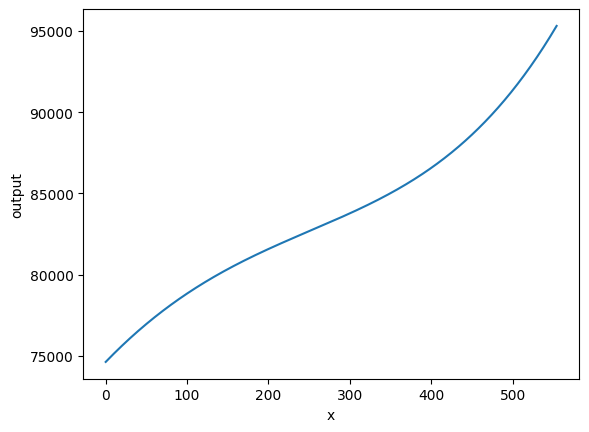

In [ ]:
plot_x = np.array([[i, 250] for i in range(0,555)])
plot_x = plot_x.reshape(-1,2)

#print(plot_x)
print(plot_x[:,0])

degree = 4

def generate_plot_y_data(d, coef, inter):
  result = inter
  help = list(plot_x)
  for i in range(0, d):
    help = plot_x
    for j in range(0, i):
      help = help * plot_x
    result = coef[i]*help + result
  return result

poly = PolynomialFeatures(degree, include_bias = False)
poly_features = poly.fit_transform(XY_model)
model = LinearRegression()
model.fit(poly_features, P_values)

plot_x = poly.fit_transform(plot_x)
y_predicted = model.predict(plot_x)

plt.xlabel("x")
plt.ylabel("output")
plt.plot(plot_x[:,0], y_predicted)

#plot_y = generate_plot_y_data(degree, model.coef_, model.intercept_)

In [ ]:
plt.figure(figsize=(15,10))
for degree in range(1,10):
  plot_x = np.array([[i, 250] for i in range(0,555)])
  plot_x = plot_x.reshape(-1,2)

  poly = PolynomialFeatures(degree, include_bias = False)
  poly_features = poly.fit_transform(XY_model)
  model = LinearRegression()
  model.fit(poly_features, P_values)

  plot_x = poly.fit_transform(plot_x)
  y_predicted = model.predict(plot_x)

  plt.xlabel("x")
  plt.ylabel("output")
  plt.plot(plot_x[:,0], y_predicted)



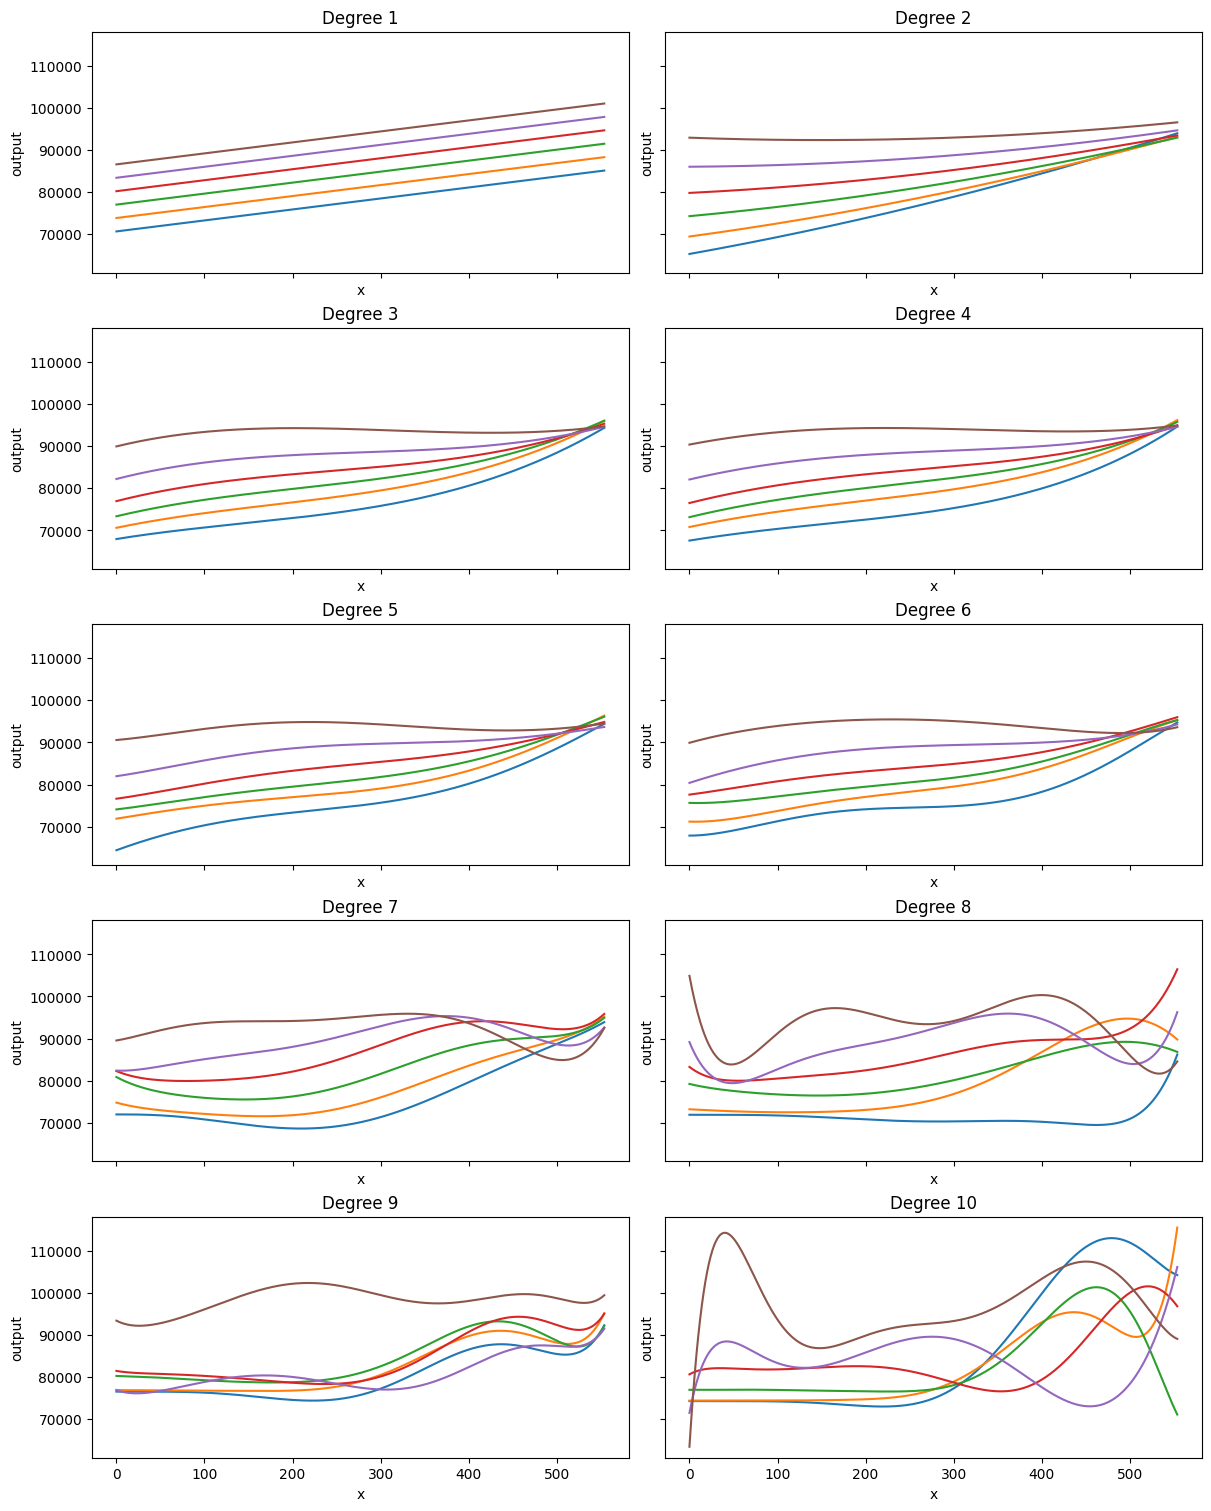

In [ ]:
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True, layout="constrained")
fig.set_figheight(15)
fig.set_figwidth(12)

for degree in range(1,11):
  for Y in range(0,501,100):
    plot_x = np.array([[i, Y] for i in range(0,555)])
    plot_x = plot_x.reshape(-1,2)

    poly = PolynomialFeatures(degree, include_bias = False)
    poly_features = poly.fit_transform(XY_model)
    model = LinearRegression()
    model.fit(poly_features, P_values)

    plot_x = poly.fit_transform(plot_x)
    y_predicted = model.predict(plot_x)

    place = [(degree-1)//2, (degree+1)%2]

    axs[place[0], place[1]].set_title("Degree " + str(degree))
    axs[place[0], place[1]].set_xlabel("x")
    axs[place[0], place[1]].set_ylabel("output")
    axs[place[0], place[1]].plot(plot_x[:,0], y_predicted)